In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
# Load data
path = os.path.join("..", "data", "csvresults", "atari_meta.csv")
df = pd.read_csv(path)
df = df.drop('Unnamed: 0', axis=1).set_index("game")
df = df.drop(["Tennis", "Venture", "MontezumaRevenge"])
df.head()

,reg_loss,reg_mse,reg_mae,reg_val_loss,reg_val_mse,reg_val_mae,hlg_mse,hlg_mae,hlg_loss,hlg_val_mse,hlg_val_mae,hlg_val_loss,y_sd,reg_sd,hlg_sd,kl_mean,kl_sd,hist_sd
game,,,,,,,,,,,,,,,,,,
AirRaid,0.008682,0.008682,0.067155,0.010074,0.010074,0.059409,0.008873,0.068780,3.126328,0.008873,0.068190,3.125896,0.136130,0.00000,0.000000,1.354709,1.336799,0.096615
Alien,0.000827,0.000827,0.008731,0.000716,0.000716,0.008891,0.000843,0.007925,2.243576,0.000709,0.008230,2.240457,0.002764,0.00000,0.000692,0.034985,0.007338,0.040571
Amidar,0.000378,0.000378,0.007455,0.000627,0.000627,0.009036,0.000245,0.004485,2.171497,0.001080,0.012648,2.403203,0.011969,0.01614,0.013054,1.802306,2.315752,0.028396
Assault,0.000014,0.000014,0.000053,0.000021,0.000021,0.000043,0.000014,0.000040,2.125762,0.000021,0.000046,2.124676,0.000000,0.00000,0.000000,0.000075,0.000000,0.024049
Asterix,0.000210,0.000210,0.001097,0.000207,0.000207,0.001159,0.000085,0.000581,2.128017,0.000098,0.000816,2.125485,0.000045,0.00000,0.000057,5.000000,0.000000,0.024059


In [28]:
# Select variable to test for mean zero

#Y = (df["hlg_val_mae"].to_numpy() / df["reg_val_mae"].to_numpy()) - 1
#Y = np.sqrt(df["hlg_val_mse"].to_numpy()) / np.sqrt(df["reg_val_mse"].to_numpy()) - 1
#Y = np.log(df["hlg_val_mae"].to_numpy() / df["reg_val_mae"].to_numpy())
Y = np.log(np.sqrt(df["hlg_val_mse"].to_numpy()) / np.sqrt(df["reg_val_mse"].to_numpy()))
Y

array([-6.34677767e-02, -4.56399982e-03,  2.71753227e-01, -1.85497799e-05,
       -3.73678865e-01, -7.93417059e-02, -2.38656698e-02,  7.89783732e-04,
       -7.25267362e-02,  3.01501128e-02,  1.02942196e-01, -3.13073407e-03,
        4.55281071e-01,  1.00601403e-02, -6.58916178e-03, -2.53044433e-02,
       -8.96079127e-04, -1.38274828e-01,  3.56632326e-01, -6.06644981e-02,
       -7.65437213e-03,  1.17014329e-04, -1.17679397e-03, -2.51583723e-01,
        1.74793232e-01, -2.55409613e-03, -2.86148322e-03,  4.01298348e-01,
       -2.27495766e-02, -5.27052663e-01, -3.97317011e-02, -4.91009542e-01,
       -3.61886959e-05, -6.40567783e-01,  2.35485064e-01, -2.11278756e+00,
       -5.52443357e-01, -1.43568931e-04,  1.09136182e-01, -7.70438595e-03,
        6.35143591e-02, -2.58306631e+00,  1.44474921e-03, -6.86355553e-02,
        1.62649558e-01, -1.23974707e-02, -5.90389437e-01, -3.16451786e-02,
       -3.09979662e-02,  1.12579911e-01, -1.73539875e-01, -1.05810024e-01,
       -2.46559268e-01, -

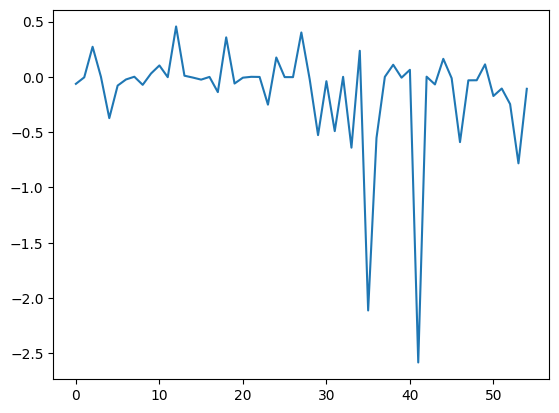

In [29]:
# Plot Y
plt.plot(Y)
plt.show()

In [30]:
# Compute estimated mean, standard error, test statistic
n = len(Y)
b_hat = np.mean(Y)
se_b = np.std(Y, ddof=1) / np.sqrt(n)
t = b_hat / se_b
b_hat, se_b, t

(-0.14104157857361901, 0.06698007177149297, -2.1057245064590537)

In [31]:
# Compute confidence interval
alpha = 0.05
t_star = stats.t.ppf(1 - alpha / 2, n - 1)
low = b_hat - t_star * se_b
high = b_hat + t_star * se_b

low, high

(-0.27532853708102434, -0.00675462006621369)

In [32]:
# Compute one-sided p-value
p_val = stats.t.cdf(-abs(t), n - 1)
p_val

0.019946790480459452